In [53]:
import pandas as pd
import numpy as np

In [51]:
price_p0 = pd.read_csv("../data/Phase 0 - Price.csv")
sales_p0 = pd.read_csv("../data/Phase 0 - Sales.csv")

test_price = pd.read_csv("../data/Phase 1 - Price.csv")
test_sales = pd.read_csv("../data/Phase 1 - Sales.csv")

In [8]:
print("Shape of price and sales", price_p0.shape, sales_p0.shape)

Shape of price and sales (15053, 173) (15053, 173)


In [7]:
price_p0.head()

,Client,Warehouse,Product,2020-07-06,2020-07-13,2020-07-20,2020-07-27,2020-08-03,2020-08-10,2020-08-17,...,2023-07-31,2023-08-07,2023-08-14,2023-08-21,2023-08-28,2023-09-04,2023-09-11,2023-09-18,2023-09-25,2023-10-02
0,0,1,367,10.900001,10.900001,10.900001,15.582857,27.289999,27.289999,27.289999,...,52.940000,NaN,52.940000,NaN,52.9400,51.860000,NaN,NaN,51.859997,NaN
1,0,1,639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.900000,99.866000,106.897995,117.711670,113.4620,104.710000,121.850,118.425000,100.307220,103.450000
2,0,1,655,21.343332,21.343332,21.343332,22.881200,25.188000,25.188000,25.188000,...,30.794443,29.555000,28.605000,29.823334,31.4225,30.751665,NaN,30.691765,21.125238,7.572973
3,0,1,1149,11.480000,11.480000,11.480000,12.291429,14.320000,14.320000,14.320000,...,34.980000,34.980000,35.000000,NaN,34.9900,34.275000,34.275,34.280000,NaN,33.860000
4,0,1,1485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.936190,29.583042,29.765000,29.580000,29.5800,28.980000,NaN,28.977728,28.875000,28.628334


In [6]:
price_p0[['Client', 'Warehouse', 'Product']].drop_duplicates()

,Client,Warehouse,Product
0,0,1,367
1,0,1,639
2,0,1,655
3,0,1,1149
4,0,1,1485
...,...,...,...
15048,46,318,13485
15049,46,318,13582
15050,46,318,13691
15051,46,318,13946


In [9]:
sales_p0.head()

,Client,Warehouse,Product,2020-07-06,2020-07-13,2020-07-20,2020-07-27,2020-08-03,2020-08-10,2020-08-17,...,2023-07-31,2023-08-07,2023-08-14,2023-08-21,2023-08-28,2023-09-04,2023-09-11,2023-09-18,2023-09-25,2023-10-02
0,0,1,367,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,7.0,0.0
1,0,1,639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,5.0,5.0,6.0,5.0,1.0,2.0,2.0,18.0,2.0
2,0,1,655,21.0,21.0,21.0,25.0,35.0,35.0,35.0,...,9.0,4.0,2.0,9.0,8.0,6.0,0.0,17.0,21.0,37.0
3,0,1,1149,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,1.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0
4,0,1,1485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,23.0,2.0,1.0,1.0,2.0,0.0,22.0,10.0,6.0


In [10]:
sales_p0[['Client', 'Warehouse', 'Product']].drop_duplicates()

,Client,Warehouse,Product
0,0,1,367
1,0,1,639
2,0,1,655
3,0,1,1149
4,0,1,1485
...,...,...,...
15048,46,318,13485
15049,46,318,13582
15050,46,318,13691
15051,46,318,13946


In [ ]:
sales_p0[['Client', 'Warehouse', 'Product']].merge(price_p0[['Client', 'Warehouse', 'Product']], on = ['Client', 'Warehouse', 'Product'], how = 'inner').shapea

(15053, 3)

In [17]:
# single product
client = 0
warehouse = 1
product = 367

sales_p0_subset = sales_p0[
    (sales_p0['Client'] == client) & \
    (sales_p0['Warehouse'] == warehouse) & \
    (sales_p0['Product'] ==  product)
]

price_p0_subset = price_p0[
    (price_p0['Client'] == client) & \
    (price_p0['Warehouse'] == warehouse) & \
    (price_p0['Product'] ==  product)
]

In [18]:
sales_p0_date_cols = [col for col in sales_p0.columns if col not in ['Client', 'Warehouse', 'Product']]
price_p0_date_cols = [col for col in price_p0.columns if col not in ['Client', 'Warehouse', 'Product']]

In [27]:
sales_p0_subset_ts = sales_p0_subset[sales_p0_date_cols].T
price_p0_subset_ts = price_p0_subset[price_p0_date_cols].T

In [28]:
sales_p0_subset_ts.columns = ['sales']
price_p0_subset_ts.columns = ['price']

In [38]:
price_p0_subset_ts.index = pd.to_datetime(price_p0_subset_ts.index)
sales_p0_subset_ts.index = pd.to_datetime(sales_p0_subset_ts.index)

price_p0_subset_ts.sort_index(inplace=True)
sales_p0_subset_ts.sort_index(inplace=True)

In [39]:
import matplotlib.pyplot as plt

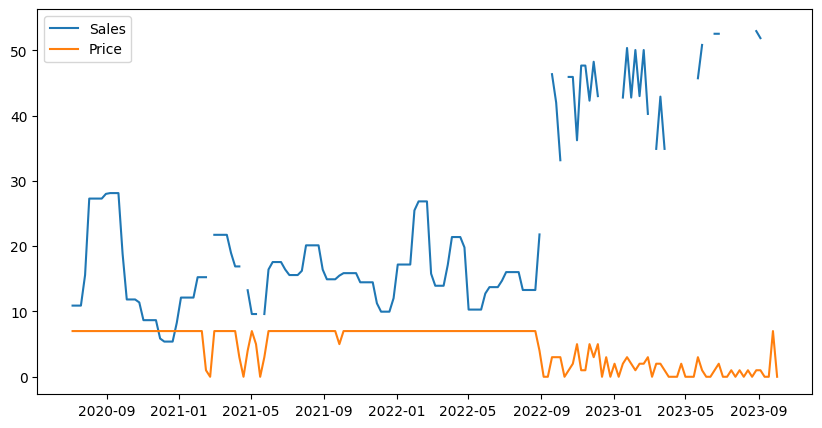

In [50]:
plt.figure(figsize=(10,5))
plt.plot(price_p0_subset_ts)
plt.plot(sales_p0_subset_ts)

plt.legend(['Sales', 'Price'])
plt.show()

In [69]:
# Read price data
price = pd.read_csv("../data/Phase 0 - Price.csv", na_values=np.nan)
price["Value"] = "Price"
price = price.set_index(["Client", "Warehouse","Product", "Value"]).stack()

# Read sales data
sales = pd.read_csv("../data/Phase 0 - Sales.csv", na_values=np.nan)
sales["Value"] = "Sales"
sales = sales.set_index(["Client", "Warehouse","Product", "Value"]).stack()

# Read price validation data
price_test = pd.read_csv("../data/Phase 1 - Price.csv", na_values=np.nan)
price_test["Value"] = "Price"
price_test = price_test.set_index(["Client", "Warehouse","Product", "Value"]).stack()

# Read sales validation data
sales_test = pd.read_csv("../data/Phase 1 - Sales.csv", na_values=np.nan)
sales_test["Value"] = "Sales"
sales_test = sales_test.set_index(["Client", "Warehouse","Product", "Value"]).stack()


In [70]:

# Create single dataframe
df = pd.concat([price, sales]).unstack("Value").reset_index()
df.columns = ["Client", "Warehouse", "Product", "ds", "Price", "y"]
df["ds"] = pd.to_datetime(df["ds"])
df = df.astype({"Price": np.float32,
                "y": np.float32,
                "Client": "category",
                "Warehouse": "category",
                "Product": "category",
                })

df_test = pd.concat([price_test, sales_test]).unstack("Value").reset_index()
df_test.columns = ["Client", "Warehouse", "Product", "ds", "Price", "y"]
df_test["ds"] = pd.to_datetime(df_test["ds"])
df_test = df_test.astype({"Price": np.float32,
                "y": np.float32,
                "Client": "category",
                "Warehouse": "category",
                "Product": "category",
                })

In [72]:
df.shape

(2559010, 6)

In [73]:
df_test.shape

(195689, 6)

In [71]:
df.to_csv("../data/phase0_train.csv", index=False)
df_test.to_csv("../data/phase0_test.csv", index=False)

In [58]:
np.random.seed(42)
random_series = df.sample(1).loc[:, ['Client', 'Warehouse', 'Product']]
client = random_series.iloc[0]['Client']
warehouse = random_series.iloc[0]['Warehouse']
product = random_series.iloc[0]['Product']
df_filtered = df[(df.Client == client) & (df.Warehouse == warehouse) & (df.Product == product)]
# df_filtered = rm_leading_zeros(df_filtered)
display(df_filtered)
df_filtered_test = df_test[(df_test.Client == client) & (df_test.Warehouse == warehouse) & (df_test.Product == product)]
display(df_filtered_test)

,Client,Warehouse,Product,ds,Price,y
1667700,26,53,6644,2020-07-06,NaN,0.0
1667701,26,53,6644,2020-07-13,NaN,0.0
1667702,26,53,6644,2020-07-20,NaN,0.0
1667703,26,53,6644,2020-07-27,NaN,0.0
1667704,26,53,6644,2020-08-03,NaN,0.0
...,...,...,...,...,...,...
1667865,26,53,6644,2023-09-04,49.950001,6.0
1667866,26,53,6644,2023-09-11,49.950001,1.0
1667867,26,53,6644,2023-09-18,NaN,0.0
1667868,26,53,6644,2023-09-25,46.200001,4.0


,Client,Warehouse,Product,ds,Price,y
127530,26,53,6644,2023-10-09,49.950001,2.0
127531,26,53,6644,2023-10-16,49.950001,2.0
127532,26,53,6644,2023-10-23,49.950001,1.0
127533,26,53,6644,2023-10-30,NaN,0.0
127534,26,53,6644,2023-11-06,NaN,0.0
127535,26,53,6644,2023-11-13,44.950001,1.0
127536,26,53,6644,2023-11-20,38.956669,6.0
127537,26,53,6644,2023-11-27,47.450001,2.0
127538,26,53,6644,2023-12-04,NaN,0.0
127539,26,53,6644,2023-12-11,44.950001,2.0


In [59]:
df_selected = df_filtered[['y', 'ds']].set_index('ds')
df_selected.index = pd.to_datetime(df_selected.index)
display(df_selected)

,y
ds,
2020-07-06,0.0
2020-07-13,0.0
2020-07-20,0.0
2020-07-27,0.0
2020-08-03,0.0
...,...
2023-09-04,6.0
2023-09-11,1.0
2023-09-18,0.0


In [60]:
df_selected_test = df_filtered_test[['y', 'ds']].set_index('ds')
df_selected_test.index = pd.to_datetime(df_selected_test.index)
display(df_selected_test)

,y
ds,
2023-10-09,2.0
2023-10-16,2.0
2023-10-23,1.0
2023-10-30,0.0
2023-11-06,0.0
2023-11-13,1.0
2023-11-20,6.0
2023-11-27,2.0
2023-12-04,0.0


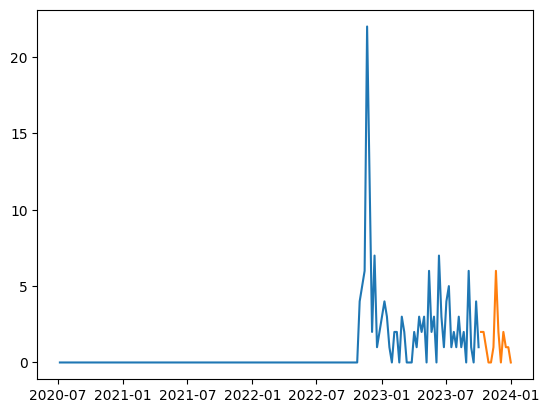

In [61]:
plt.plot(df_selected)
plt.plot(df_selected_test)